# QuTiP example: Single-Qubit Dynamics - RWA - 2Dsim

This example shows hoe to implement 2 - dimensional simulation and 2D plot in qutip

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *
from qutip.ui.progressbar import TextProgressBar as ProgressBar

In [5]:

options=Options(nsteps=200000)
use_rwa = True
def calculate():
    rmat = np.zeros((len(frelist),len(tlist)))
    pbar = ProgressBar(len(frelist))
    # collapse operators
    c_ops = []
    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())
    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    for i in range(len(frelist)):
        pbar.update(i)
        wmw = frelist[i]
        H0 = 0
        H1 = 0
        args={'wmw': wmw}
        if use_rwa:
            H = (w0-wmw) / 2.0 * sigmaz() + wR / 2.0 * sigmax()
            output = mesolve(H, rho0, tlist, c_ops, [sigmax(),sigmay(),sigmaz()],options=options)           
        else: 
            H = [H0,[H1,'np.sin(wmw*t)*np.heaviside(0.5-t,0)']]
            output = mesolve(H, rho0, tlist, c_ops, [sigmax(),sigmay(),sigmaz()],args,options=options)
        rmat[i] = output.expect[2]
    return rmat


In [12]:
w0 = 10 * 2 * np.pi # qubit frequency
wR = 0.3 * 2 * np.pi  # Rabi amplitude

tlist = np.linspace(0,10,201)
frelist = np.linspace(6,14,51) * 2* np.pi 
g2 = 0.0
g1 = 0.0

# intial state
rho0 = ket2dm(basis(2,0))

rmat=calculate()

11.8%. Run time:   0.27s. Est. time left: 00:00:00:02
21.6%. Run time:   0.44s. Est. time left: 00:00:00:01
31.4%. Run time:   0.58s. Est. time left: 00:00:00:01
41.2%. Run time:   0.68s. Est. time left: 00:00:00:00
51.0%. Run time:   0.77s. Est. time left: 00:00:00:00
60.8%. Run time:   0.86s. Est. time left: 00:00:00:00
70.6%. Run time:   0.97s. Est. time left: 00:00:00:00
80.4%. Run time:   1.13s. Est. time left: 00:00:00:00
90.2%. Run time:   1.30s. Est. time left: 00:00:00:00


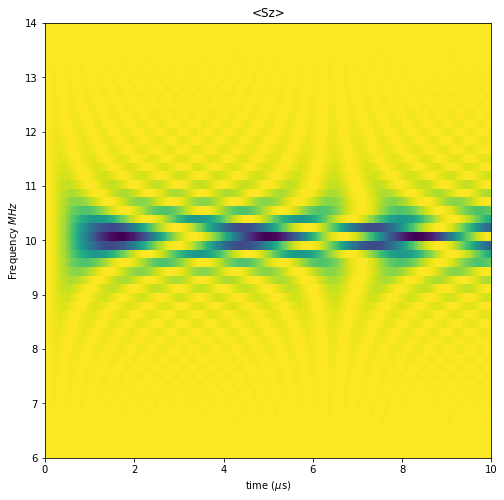

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

t_mat, fre_mat = np.meshgrid(tlist, frelist/(2*np.pi))

ax.pcolor(t_mat, fre_mat, rmat)
ax.set_xlabel(r'time ($\mu$s)')
ax.set_ylabel(r'Frequency $MHz$')
ax.set_title("<Sz>");

## Versions

In [16]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
